## Wines Classification 

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('wines.csv')

In [3]:
dataset.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
dataset.shape

(178, 14)

In [17]:
dataset.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [20]:
y = dataset['Class']
y_cat = pd.get_dummies(y)

In [21]:
X = dataset.drop('Class', axis=1)

In [22]:
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<AxesSubplot:xlabel='Alcohol', ylabel='Class'>

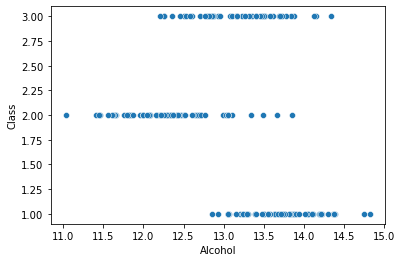

In [23]:
import seaborn as sns
sns.scatterplot(x="Alcohol", y="Class", data= dataset)

In [24]:
from keras import Sequential

In [25]:
model = Sequential()

In [29]:
from keras.layers import Dense

In [30]:
X.shape

(178, 13)

In [32]:
model.add(
    Dense(
        input_shape=(13,),
        units=5,
        activation='relu',
        kernel_initializer='he_normal'
))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 70        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.add(
    Dense(
        units=3,
        activation='softmax'
    )
)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 70        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


In [41]:
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 70        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_cat,test_size=0.2,random_state=42)

In [44]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 272.1679 - accuracy: 0.2817
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 75.5064 - accuracy: 0.4014
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 20.1690 - accuracy: 0.3803
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 10.2950 - accuracy: 0.3803
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 11.3939 - accuracy: 0.3592
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 10.6094 - accuracy: 0.3451
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 5.9214 - accuracy: 0.5211
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 12.0899 - accuracy: 0.4225
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 11.7501 - accuracy: 0.3380
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 9.3693 - accuracy: 0.3521
Epoch 11/100
5/5 [==

In [56]:
loss = pd.DataFrame(model.history.history['loss'])
accuracy = pd.DataFrame(model.history.history['accuracy'])

<AxesSubplot:>

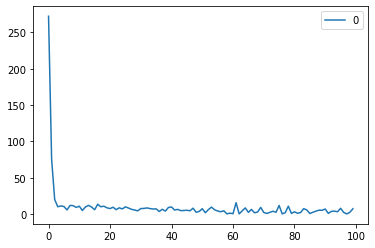

In [57]:
loss.plot()

<AxesSubplot:>

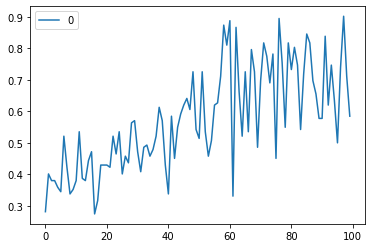

In [58]:
accuracy.plot()